In [177]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns



In [178]:
data = pd.read_csv('AI4I 2020 Predictive Maintenance Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [179]:
print(f"Number of rows: {data.shape[0]}, Number of columns: {data.shape[1]}")

Number of rows: 10000, Number of columns: 14


In [180]:
data.head(15)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [181]:
data.drop(['Product ID', 'UDI'], axis=1, inplace = True)

In [182]:
data.head(15)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [183]:
# rename dataset columns
data.rename(columns = {'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Rotational speed [rpm]':'Rotational speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool wear'},
          inplace = True)

In [184]:
# overall descriptive information on numerical attributes
df_numeric = data.select_dtypes(include=[np.number])
df_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Air temperature,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.0,1.0


In [185]:
# overall descriptive information on categorical attributes
df_categorical = data.select_dtypes(include=[np.object_])
df_categorical.describe().transpose()

,count,unique,top,freq
Type,10000,3,L,6000


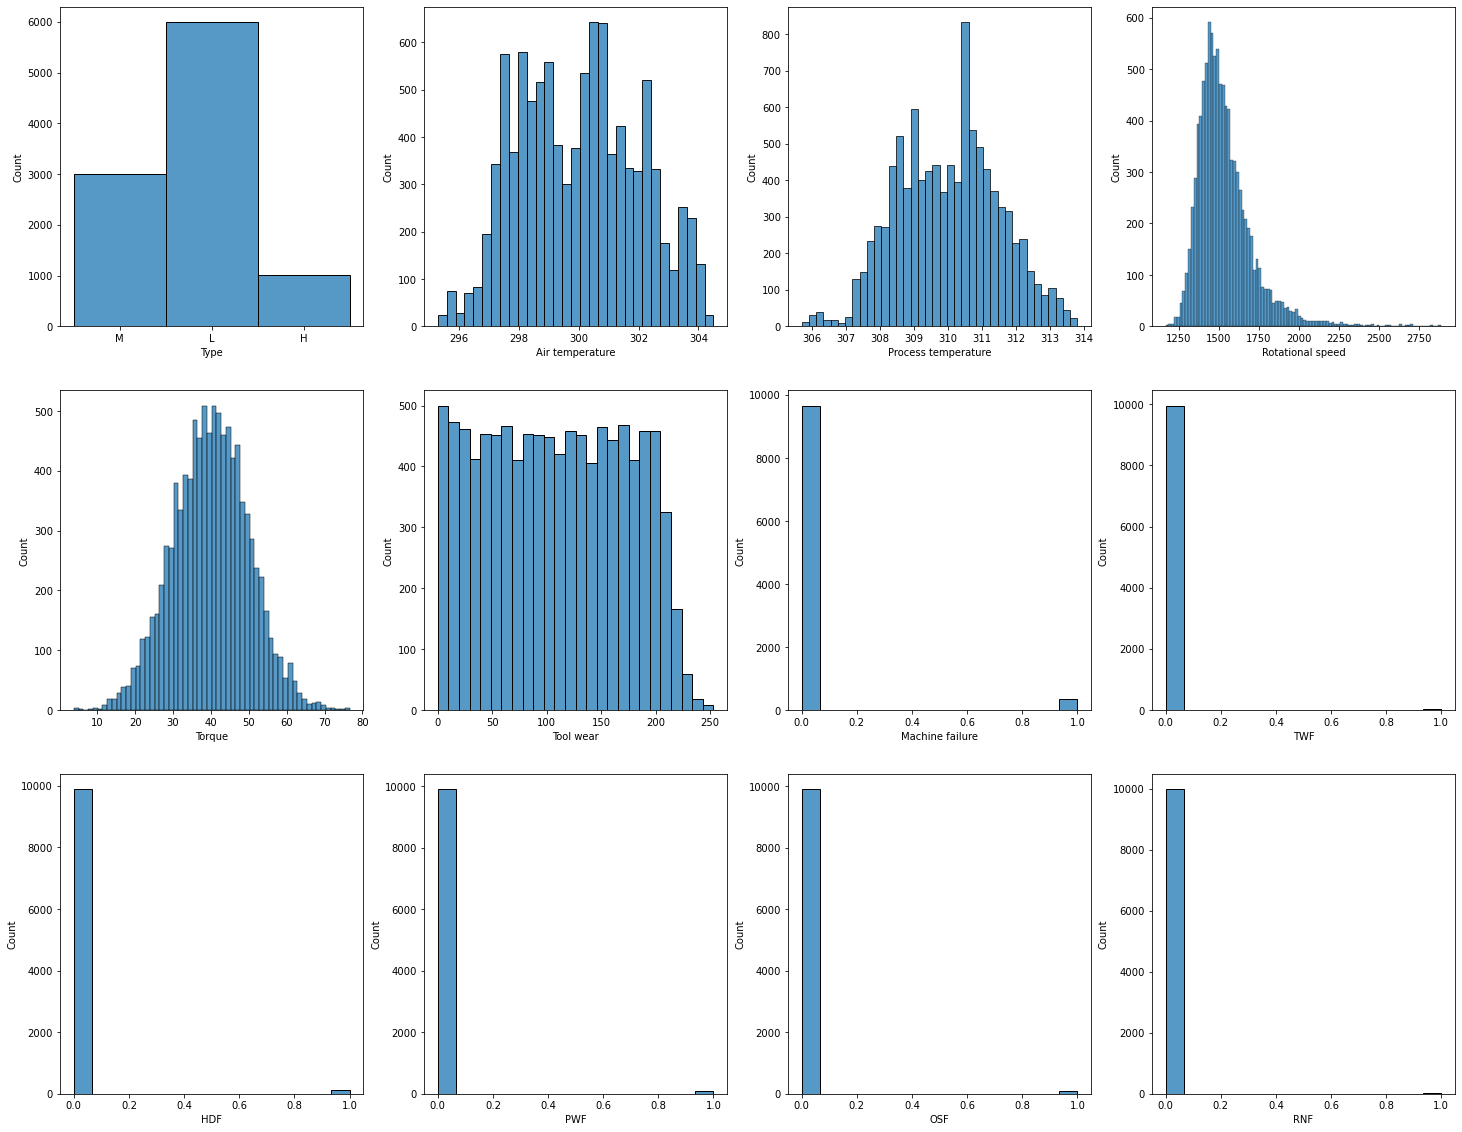

In [186]:
 #data is imbalanced (Type, Machine failure, TWF, HDF, PWF, OSF, RNF)
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=ax[i//4][i%4])

Text(0.5, 1.0, 'Number of failure types per record')

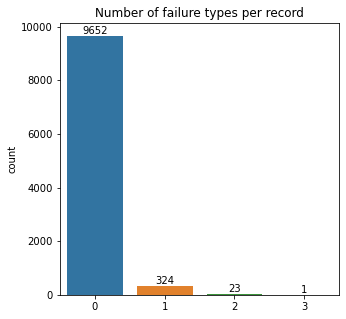

In [187]:
df_failures = data.loc[:, ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

# Calculate the sum of the values in each row
rows_sum = df_failures.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
ax.set_title('Number of failure types per record')

#As shown above, 24 records contain more than one type of failure, but their count is very small compared to the entire data set, so we will combine the failure types into one feature. The individual failure types are then dropped.

No failure = 0, TWF = HDF = PWF = OSF = RNF = 1

In [188]:
data['Machine failure'] = 0

data.loc[data['TWF'] == 1, 'Machine failure'] = 1
data.loc[data['HDF'] == 1, 'Machine failure'] = 1
data.loc[data['PWF'] == 1, 'Machine failure'] = 1
data.loc[data['OSF'] == 1, 'Machine failure'] = 1
data.loc[data['RNF'] == 1, 'Machine failure'] = 1

# drop individual failure types
data.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

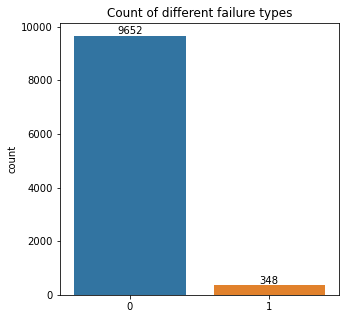

In [189]:
failure_types = data.loc[:, ['Machine failure']]

rows_sum = failure_types.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
    ax.set_title('Count of different failure types')

We can derive a new attribute using this formula:

Power = (Torque) × (Rotational speed)

<AxesSubplot:xlabel='Power', ylabel='Count'>

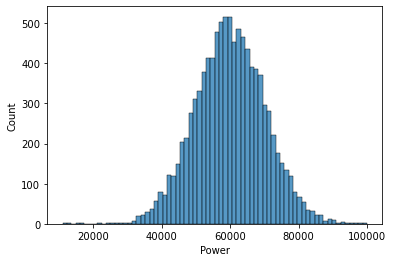

In [190]:
data['Power'] = data[['Rotational speed', 'Torque']].product(axis=1)
sns.histplot(data['Power'])

In [191]:
# convert Type attribute into numbers, such that L = 0, M = 1, and H = 2
data['Type'].replace('L', 0, inplace=True)
data['Type'].replace('M', 1, inplace=True)
data['Type'].replace('H', 2, inplace=True)

In [192]:
# turn all columns into float for easier processing later
for column in data.columns:
    data[column] = data[column].astype(float)

In [193]:
# view columns data types
data.dtypes

Type                   float64
Air temperature        float64
Process temperature    float64
Rotational speed       float64
Torque                 float64
Tool wear              float64
Machine failure        float64
Power                  float64
dtype: object

#handling outliers

In [194]:
# List of columns to exclude from normalization 

excluded_columns = ['Type', 'Machine failure']

In [195]:
# Handling it using IQR
for col in data.columns:
    if col not in excluded_columns:
        # calculate the IQR (interquartile range)
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = data[(data[col] <= (Q1 - 1.5 * IQR)) | (data[col] >= (Q3 + 1.5 * IQR))]
        if not outliers.empty:
          #df.loc[outliers.index, col] = winsorize(outliers[col], limits=[0.08, 0.08])
          data.drop(outliers.index, inplace=True)

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Assigning dependent and independent values

In [197]:
y=data["Machine failure"]
x=data.drop(["Machine failure"],axis =1)

In [198]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=Normalizer().fit_transform(x)

# Splitting data

In [199]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=0)

# Naive Bayes Classifier

In [200]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [201]:
print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.938
Precision: 0.582
Recall: 0.653
F1 score: 0.605


<AxesSubplot:>

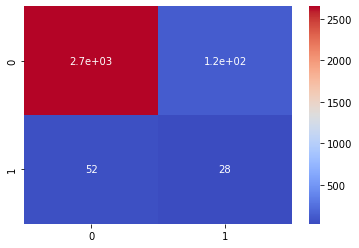

In [202]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')

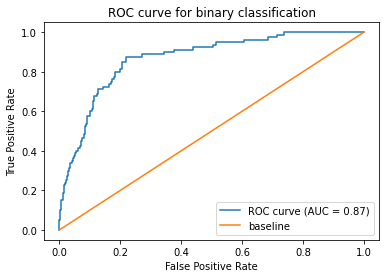

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

# Decision Tree Model

In [204]:
#Create the object
model = DecisionTreeClassifier()

#Train the model
model = model.fit(x_train, y_train)

#Predict the model
y_pred = model.predict(x_test)

In [205]:
print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.965
Precision: 0.681
Recall: 0.679
F1 score: 0.680


<AxesSubplot:>

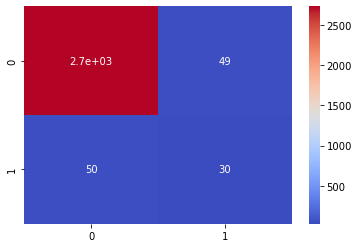

In [206]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')


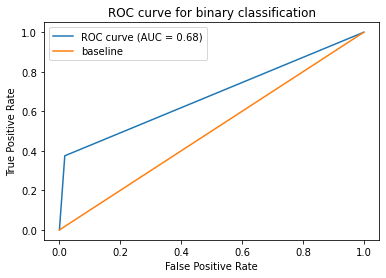

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

# Random Forest Classifier¶


In [208]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 0)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [209]:
print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.978
Precision: 0.961
Recall: 0.606
F1 score: 0.668


<AxesSubplot:>

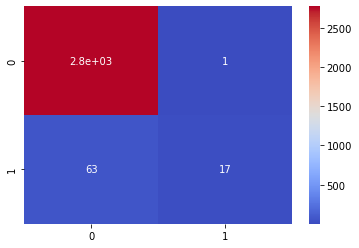

In [210]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')

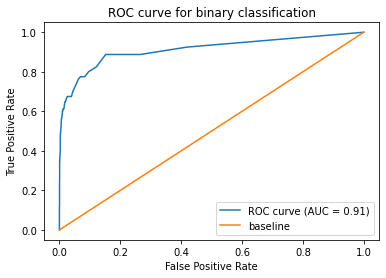

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

#  Random Forest with 20 Trees

In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
# instantiate the classifier with n_estimators = 100

model_100 = RandomForestClassifier(n_estimators=20, n_jobs=3,random_state=0)



# fit the model to the training set

model_100.fit(x_train, y_train)



# Predict on the test set results

y_pred = model_100.predict(x_test)



# Check accuracy score 

print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.974
Precision: 0.897
Recall: 0.556
F1 score: 0.592


<AxesSubplot:>

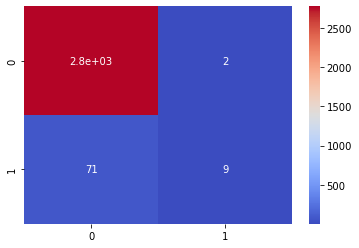

In [213]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')

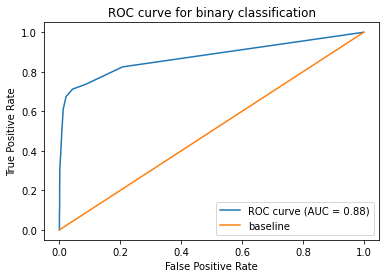

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model_100.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

# Logistic Regression¶


In [215]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 16)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [216]:
print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.972
Precision: 0.486
Recall: 0.500
F1 score: 0.493


D:\anacondaapp\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

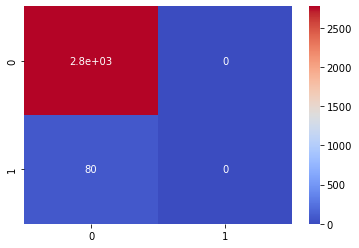

In [217]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')

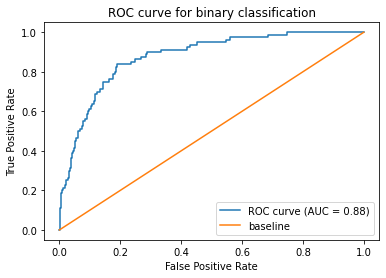

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

 # Gradient Boosting¶


In [219]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.datasets import load_digits

In [220]:
SEED = 23
y=data["Machine failure"]
x=data.drop(["Machine failure"],axis =1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = SEED)

In [221]:
model = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=100,max_features = 5)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [222]:
print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.984
Precision: 0.889
Recall: 0.753
F1 score: 0.805


<AxesSubplot:>

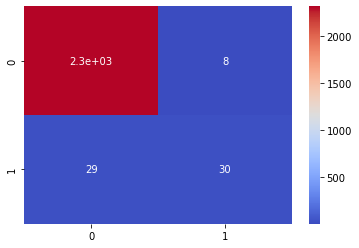

In [223]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')

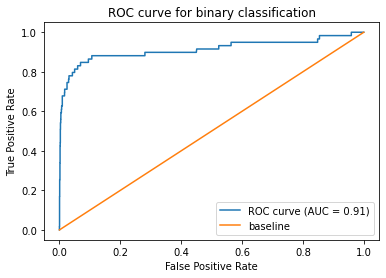

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

In [225]:
data.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Machine failure', 'Power'],
      dtype='object')

# ADA BOOSTING¶


In [226]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [227]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

model=AdaBoostClassifier(n_estimators = 50, learning_rate=1)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [228]:
print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.975
Precision: 0.846
Recall: 0.664
F1 score: 0.721


<AxesSubplot:>

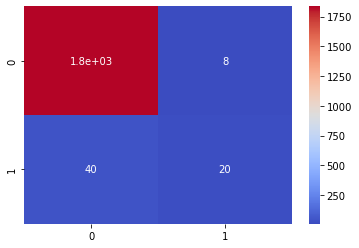

In [229]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')

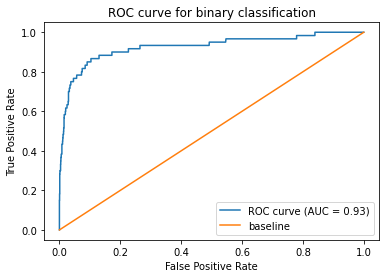

In [230]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

# Autologging result

In [231]:
from AutoLogging_ML import AutoLogger
b,model1 = AutoLogger.train_and_log_classification(x_train, y_train, x_test, y_test)

D:\anacondaapp\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anacondaapp\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anacondaapp\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anacondaapp\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: 

Learning rate set to 0.024515
0:	learn: 0.6490145	total: 4.04ms	remaining: 4.04s
1:	learn: 0.6055890	total: 7.83ms	remaining: 3.9s
2:	learn: 0.5616106	total: 11.5ms	remaining: 3.81s
3:	learn: 0.5215709	total: 15.2ms	remaining: 3.78s
4:	learn: 0.4869540	total: 18.5ms	remaining: 3.69s
5:	learn: 0.4536937	total: 22.3ms	remaining: 3.7s
6:	learn: 0.4255896	total: 26ms	remaining: 3.69s
7:	learn: 0.3970729	total: 29.7ms	remaining: 3.69s
8:	learn: 0.3682310	total: 33.6ms	remaining: 3.7s
9:	learn: 0.3463623	total: 37.3ms	remaining: 3.69s
10:	learn: 0.3231371	total: 40.8ms	remaining: 3.67s
11:	learn: 0.3048447	total: 44.3ms	remaining: 3.65s
12:	learn: 0.2876705	total: 48ms	remaining: 3.64s
13:	learn: 0.2716733	total: 51.7ms	remaining: 3.64s
14:	learn: 0.2571329	total: 55.2ms	remaining: 3.62s
15:	learn: 0.2430423	total: 58.8ms	remaining: 3.62s
16:	learn: 0.2280833	total: 62.3ms	remaining: 3.6s
17:	learn: 0.2137288	total: 65.8ms	remaining: 3.59s
18:	learn: 0.2026678	total: 69.2ms	remaining: 3.57s


171:	learn: 0.0400760	total: 538ms	remaining: 2.59s
172:	learn: 0.0400686	total: 540ms	remaining: 2.58s
173:	learn: 0.0399954	total: 543ms	remaining: 2.58s
174:	learn: 0.0399734	total: 547ms	remaining: 2.58s
175:	learn: 0.0398999	total: 550ms	remaining: 2.58s
176:	learn: 0.0397563	total: 553ms	remaining: 2.57s
177:	learn: 0.0397352	total: 557ms	remaining: 2.57s
178:	learn: 0.0396488	total: 560ms	remaining: 2.57s
179:	learn: 0.0396331	total: 562ms	remaining: 2.56s
180:	learn: 0.0394225	total: 566ms	remaining: 2.56s
181:	learn: 0.0393705	total: 568ms	remaining: 2.55s
182:	learn: 0.0393639	total: 571ms	remaining: 2.55s
183:	learn: 0.0393238	total: 574ms	remaining: 2.54s
184:	learn: 0.0392895	total: 576ms	remaining: 2.54s
185:	learn: 0.0391570	total: 579ms	remaining: 2.54s
186:	learn: 0.0391015	total: 582ms	remaining: 2.53s
187:	learn: 0.0389887	total: 585ms	remaining: 2.53s
188:	learn: 0.0387963	total: 588ms	remaining: 2.52s
189:	learn: 0.0387874	total: 591ms	remaining: 2.52s
190:	learn: 

350:	learn: 0.0292657	total: 1.1s	remaining: 2.03s
351:	learn: 0.0292434	total: 1.1s	remaining: 2.03s
352:	learn: 0.0291584	total: 1.1s	remaining: 2.02s
353:	learn: 0.0291337	total: 1.11s	remaining: 2.02s
354:	learn: 0.0290914	total: 1.11s	remaining: 2.02s
355:	learn: 0.0290801	total: 1.11s	remaining: 2.02s
356:	learn: 0.0290453	total: 1.12s	remaining: 2.02s
357:	learn: 0.0289866	total: 1.12s	remaining: 2.01s
358:	learn: 0.0289600	total: 1.13s	remaining: 2.01s
359:	learn: 0.0289357	total: 1.13s	remaining: 2.01s
360:	learn: 0.0288992	total: 1.13s	remaining: 2s
361:	learn: 0.0288721	total: 1.13s	remaining: 2s
362:	learn: 0.0288544	total: 1.14s	remaining: 2s
363:	learn: 0.0288059	total: 1.14s	remaining: 1.99s
364:	learn: 0.0287031	total: 1.14s	remaining: 1.99s
365:	learn: 0.0286981	total: 1.15s	remaining: 1.99s
366:	learn: 0.0286678	total: 1.15s	remaining: 1.98s
367:	learn: 0.0286404	total: 1.15s	remaining: 1.98s
368:	learn: 0.0286208	total: 1.16s	remaining: 1.98s
369:	learn: 0.0286079	to

529:	learn: 0.0229874	total: 1.66s	remaining: 1.47s
530:	learn: 0.0229677	total: 1.66s	remaining: 1.47s
531:	learn: 0.0229496	total: 1.67s	remaining: 1.47s
532:	learn: 0.0229418	total: 1.67s	remaining: 1.46s
533:	learn: 0.0229317	total: 1.67s	remaining: 1.46s
534:	learn: 0.0228788	total: 1.68s	remaining: 1.46s
535:	learn: 0.0228609	total: 1.68s	remaining: 1.46s
536:	learn: 0.0228462	total: 1.68s	remaining: 1.45s
537:	learn: 0.0227862	total: 1.69s	remaining: 1.45s
538:	learn: 0.0227665	total: 1.69s	remaining: 1.45s
539:	learn: 0.0227444	total: 1.69s	remaining: 1.44s
540:	learn: 0.0227317	total: 1.7s	remaining: 1.44s
541:	learn: 0.0227129	total: 1.7s	remaining: 1.44s
542:	learn: 0.0226930	total: 1.7s	remaining: 1.43s
543:	learn: 0.0226847	total: 1.71s	remaining: 1.43s
544:	learn: 0.0226382	total: 1.71s	remaining: 1.43s
545:	learn: 0.0226122	total: 1.71s	remaining: 1.42s
546:	learn: 0.0226043	total: 1.72s	remaining: 1.42s
547:	learn: 0.0225746	total: 1.72s	remaining: 1.42s
548:	learn: 0.0

701:	learn: 0.0190832	total: 2.2s	remaining: 934ms
702:	learn: 0.0190675	total: 2.2s	remaining: 931ms
703:	learn: 0.0190615	total: 2.21s	remaining: 928ms
704:	learn: 0.0190494	total: 2.21s	remaining: 925ms
705:	learn: 0.0190370	total: 2.21s	remaining: 921ms
706:	learn: 0.0190175	total: 2.22s	remaining: 918ms
707:	learn: 0.0189776	total: 2.22s	remaining: 915ms
708:	learn: 0.0189644	total: 2.22s	remaining: 912ms
709:	learn: 0.0189526	total: 2.23s	remaining: 909ms
710:	learn: 0.0189062	total: 2.23s	remaining: 906ms
711:	learn: 0.0188775	total: 2.23s	remaining: 903ms
712:	learn: 0.0188730	total: 2.23s	remaining: 900ms
713:	learn: 0.0188368	total: 2.24s	remaining: 897ms
714:	learn: 0.0188195	total: 2.24s	remaining: 893ms
715:	learn: 0.0188063	total: 2.24s	remaining: 890ms
716:	learn: 0.0187994	total: 2.25s	remaining: 887ms
717:	learn: 0.0187808	total: 2.25s	remaining: 884ms
718:	learn: 0.0187740	total: 2.25s	remaining: 881ms
719:	learn: 0.0187264	total: 2.26s	remaining: 878ms
720:	learn: 0.

872:	learn: 0.0159885	total: 2.74s	remaining: 399ms
873:	learn: 0.0159861	total: 2.75s	remaining: 396ms
874:	learn: 0.0159683	total: 2.75s	remaining: 393ms
875:	learn: 0.0159451	total: 2.75s	remaining: 390ms
876:	learn: 0.0159123	total: 2.76s	remaining: 387ms
877:	learn: 0.0158897	total: 2.76s	remaining: 384ms
878:	learn: 0.0158548	total: 2.76s	remaining: 380ms
879:	learn: 0.0158487	total: 2.77s	remaining: 377ms
880:	learn: 0.0158340	total: 2.77s	remaining: 374ms
881:	learn: 0.0158197	total: 2.77s	remaining: 371ms
882:	learn: 0.0158068	total: 2.78s	remaining: 368ms
883:	learn: 0.0157851	total: 2.78s	remaining: 365ms
884:	learn: 0.0157559	total: 2.78s	remaining: 362ms
885:	learn: 0.0157411	total: 2.79s	remaining: 359ms
886:	learn: 0.0157298	total: 2.79s	remaining: 355ms
887:	learn: 0.0157236	total: 2.79s	remaining: 352ms
888:	learn: 0.0157145	total: 2.8s	remaining: 349ms
889:	learn: 0.0156867	total: 2.8s	remaining: 346ms
890:	learn: 0.0156607	total: 2.8s	remaining: 343ms
891:	learn: 0.0

In [232]:
b

,model,training-accuracy,training-precision,training-recall,training-f1,training-confusion matrix,validation-accuracy,validation-precision,validation-recall,validation-f1,validation-confusion matrix,training-classification report,validation-classification report
4,naive bayes,95.220588,61.841940,69.875262,64.679339,"[[7167, 252], [112, 85]]",94.275210,61.656734,68.826826,64.229711,"[[1770, 74], [35, 25]]",precision recall f1-score ...,precision recall f1-score ...
14,quadratic discriminant analysis,96.783088,68.314895,68.947783,68.625399,"[[7293, 126], [119, 78]]",95.798319,65.268801,64.775850,65.017684,"[[1805, 39], [41, 19]]",precision recall f1-score ...,precision recall f1-score ...
13,linear discriminant analysis,96.796218,65.536999,61.048358,62.871464,"[[7326, 93], [151, 46]]",95.903361,64.412716,61.605206,62.834835,"[[1811, 33], [45, 15]]",precision recall f1-score ...,precision recall f1-score ...
0,svm-linear,97.413340,48.706670,50.000000,49.344862,"[[7419, 0], [197, 0]]",96.848739,48.424370,50.000000,49.199573,"[[1844, 0], [60, 0]]",precision recall f1-score ...,precision recall f1-score ...
1,svm-rbf,97.413340,48.706670,50.000000,49.344862,"[[7419, 0], [197, 0]]",96.848739,48.424370,50.000000,49.199573,"[[1844, 0], [60, 0]]",precision recall f1-score ...,precision recall f1-score ...
2,svm-poly,97.413340,48.706670,50.000000,49.344862,"[[7419, 0], [197, 0]]",96.848739,48.424370,50.000000,49.199573,"[[1844, 0], [60, 0]]",precision recall f1-score ...,precision recall f1-score ...
10,logistic regression,97.492122,92.501314,51.769910,52.779111,"[[7418, 1], [190, 7]]",96.901261,98.449816,50.833333,50.852048,"[[1844, 0], [59, 1]]",precision recall f1-score ...,precision recall f1-score ...
3,knn,97.610294,95.867877,54.054174,56.870696,"[[7418, 1], [181, 16]]",97.006303,84.264628,54.112437,56.700858,"[[1842, 2], [55, 5]]",precision recall f1-score ...,precision recall f1-score ...
7,adaboost,97.794118,82.229368,64.772436,70.067347,"[[7389, 30], [138, 59]]",97.478992,84.648188,66.449747,72.082111,"[[1836, 8], [40, 20]]",precision recall f1-score ...,precision recall f1-score ...
12,extra trees classifier,100.000000,100.000000,100.000000,100.000000,"[[7419, 0], [0, 197]]",97.689076,98.834746,63.333333,70.463135,"[[1844, 0], [44, 16]]",precision recall f1-score ...,precision recall f1-score ...


In [233]:
AutoLogger.get_classification_report(b,'validation')

naive bayes
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1844
         1.0       0.25      0.42      0.31        60

    accuracy                           0.94      1904
   macro avg       0.62      0.69      0.64      1904
weighted avg       0.96      0.94      0.95      1904

quadratic discriminant analysis
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1844
           1       0.33      0.32      0.32        60

    accuracy                           0.96      1904
   macro avg       0.65      0.65      0.65      1904
weighted avg       0.96      0.96      0.96      1904

linear discriminant analysis
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1844
           1       0.31      0.25      0.28        60

    accuracy                           0.96      1904
   macro avg       0.64      0.62      0.63      1904
w